In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [10]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, MetaData

In [30]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:////Users/stellarose/Downloads/DataAnalytics/sqlalchemy-challenge/Resources/hawaii.sqlite")

In [31]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [32]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [34]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [35]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [36]:
# Find the most recent date in the data set.
most_recent_date = (session.query(Measurement.date)
                    .order_by(Measurement.date.desc())
                    .first())
most_recent_date

('2017-08-23',)

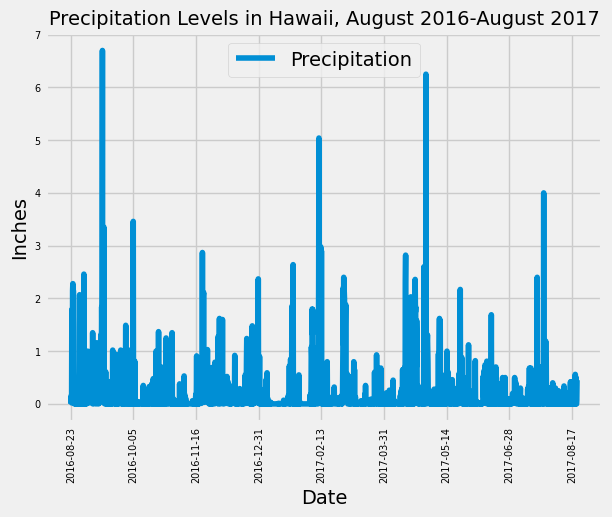

In [40]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

twelve_months = dt.date(2017, 8, 23)-dt.timedelta(days=365)

# Calculate the date one year from the last date in data set.

last_date = dt.date(twelve_months.year, twelve_months.month, twelve_months.day)

# Perform a query to retrieve the data and precipitation scores

results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= last_date).order_by(Measurement.date)

# Save the query results as a Pandas DataFrame. Explicitly set the column names

data_df = pd.DataFrame(results, columns=['date', 'precipitation'])

# Sort the dataframe by date

data_df.set_index(data_df['date'], inplace=True)
clean_data = data_df.dropna()

# Use Pandas Plotting with Matplotlib to plot the data

clean_data.plot('date', 'precipitation')

plt.xlabel("Date", size = 14)
plt.ylabel("Inches", size = 14)
plt.title("Precipitation Levels in Hawaii, August 2016-August 2017", size = 14)
plt.legend(["Precipitation"], loc='upper center')
plt.xticks(rotation=90, size = 7)
plt.yticks(size = 7)
plt.show()


In [41]:
# Use Pandas to calculate the summary statistics for the precipitation data
clean_data.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [42]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station.id).count()

9

In [43]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station)\
.order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [53]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').first()
highest_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').first()
avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').first()

print(f"Lowest temperature:", lowest_temp)
print(f"Highest temperature:", highest_temp)
print(f"Average temperature:", avg_temp)
      

Lowest temperature: (54.0,)
Highest temperature: (85.0,)
Average temperature: (71.66378066378067,)


Text(0.5, 0, 'Temperature')

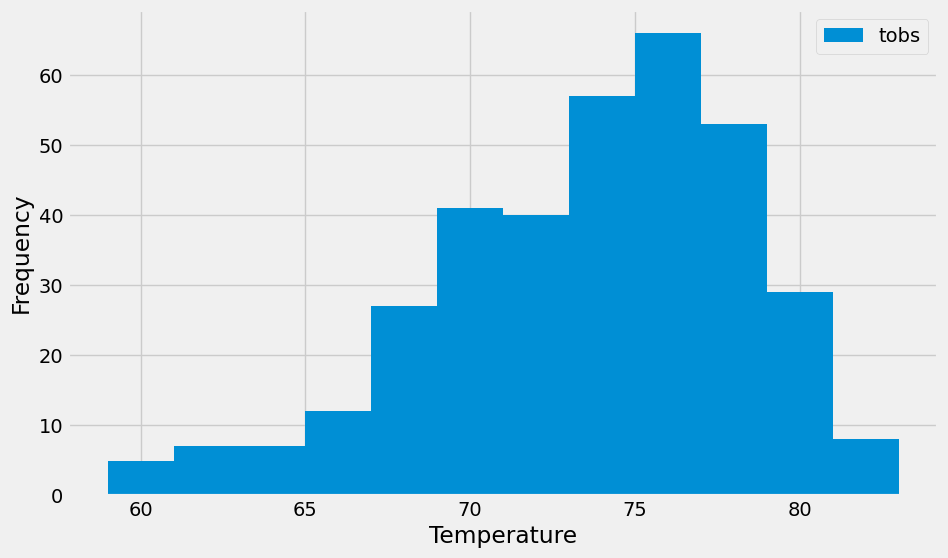

In [56]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
data = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= last_date).all()
station_df = pd.DataFrame(data, columns=['tobs'])

station_df.plot.hist(bins = 12, figsize=(10, 6))
plt.xlabel('Temperature')

# Close Session

In [57]:
# Close Session
session.close()